In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt 

rest_android = pd.read_csv("../../data_files/data_from_android_api/rest/rest_25_mins.csv")

forward_android2 = pd.read_csv("../../data_files/data_from_android_api/forward/forward_5mins_2.csv")
forward_android3 = pd.read_csv("../../data_files/data_from_android_api/forward/forward_5mins_3.csv")
forward_android4 = pd.read_csv("../../data_files/data_from_android_api/forward/forward_5mins_4.csv")
forward_android5 = pd.read_csv("../../data_files/data_from_android_api/forward/forward_5mins_5.csv")

back1 = pd.read_csv('../../data_files/data_from_android_api/back/back_5mins_1.csv')
back2 = pd.read_csv('../../data_files/data_from_android_api/back/back_5mins_2.csv')
back3 = pd.read_csv('../../data_files/data_from_android_api/back/back_5mins_3.csv')
back4 = pd.read_csv('../../data_files/data_from_android_api/back/back_5mins_4.csv')

forward = pd.concat([forward_android2, forward_android3, 
                     forward_android4, forward_android5])

back = pd.concat([back1, back2, back3, back4])

dataDF = pd.concat([forward, back])

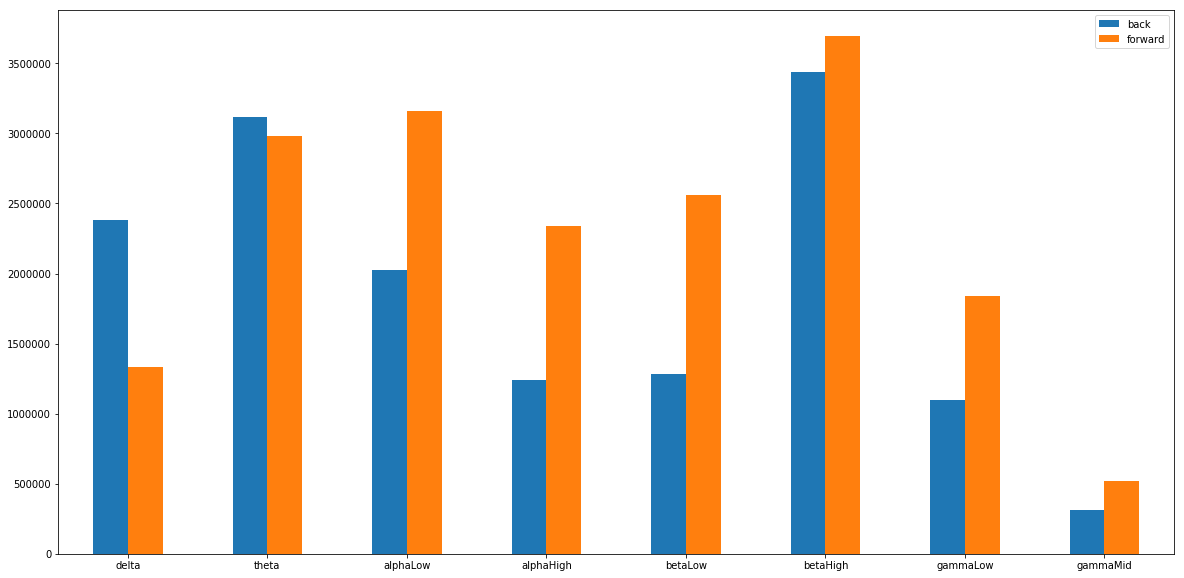

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt 

u = [back.delta.mean(), back.theta.mean(), back.alphaLow.mean(), 
     back.betaHigh.mean(), back.betaLow.mean(), back.alphaHigh.mean(), 
     back.gammaLow.mean(), back.gammaMid.mean()]

d = [forward.delta.mean(), forward.theta.mean(), forward.alphaLow.mean(), 
     forward.betaHigh.mean(), forward.betaLow.mean(), forward.alphaHigh.mean(), 
     forward.gammaLow.mean(), forward.gammaMid.mean()]


index = ['delta', 'theta', 'alphaLow','alphaHigh', 'betaLow', 'betaHigh', 'gammaLow', 'gammaMid']

df = pd.DataFrame({'back': u, 'forward': d}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))

In [3]:
# create an array of shape 30706, 9 = number of records by the features
data = np.array([[0 for x in range(8)] for y in range(len(dataDF))])
for i in range(len(dataDF)):
    data[i] = [dataDF.delta.values[i],
                       dataDF.theta.values[i],
                       dataDF.alphaLow.values[i],
                       dataDF.alphaHigh.values[i],
                       dataDF.betaLow.values[i],
                       dataDF.betaHigh.values[i],
                       dataDF.gammaLow.values[i],
                       dataDF.gammaMid.values[i]]
    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
labels = encoder.fit_transform(dataDF.action.values)

# creating training and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
stan_scaler = StandardScaler()

x_train = stan_scaler.fit_transform(x_train)
x_test = stan_scaler.transform(x_test)

all_data = dataDF.drop(['action'], axis=1)

/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
# XGBoost
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from numpy import sort
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# Random Forrest
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

print(rfc.feature_importances_)

print("The score for Random Forest ", rfc.score(x_test, y_test))
y_pred = rfc.predict(x_test)
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print(len(y_train))
print("Accuracy for x_test:", metrics.accuracy_score(y_test, y_pred))


scores = cross_val_score(rfc, all_data, labels, cv=10, scoring='accuracy')
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

# Fit model using each importance as a threshold
thresholds = sort(rfc.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(rfc, threshold=thresh, prefit=True)
	select_X_train = selection.transform(x_train)
	# train model
	selection_model = RandomForestClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(x_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

[0.20321684 0.16223317 0.09376111 0.10358343 0.10970435 0.11894603
 0.10257897 0.10597611]
The score for Random Forest  0.655448717948718
1869
Accuracy for x_test: 0.655448717948718


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selec

Cross Validation Accuracy: 0.65 (+/- 0.23)
[0.424      0.468      0.532      0.724      0.752      0.74297189
 0.73895582 0.68674699 0.68951613 0.70967742]
Thresh=0.094, n=8, Accuracy: 66.35%
Thresh=0.103, n=7, Accuracy: 67.31%
Thresh=0.104, n=6, Accuracy: 67.63%
Thresh=0.106, n=5, Accuracy: 66.19%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/darrenmoriarty/

Thresh=0.110, n=4, Accuracy: 64.42%
Thresh=0.119, n=3, Accuracy: 62.82%
Thresh=0.162, n=2, Accuracy: 63.78%
Thresh=0.203, n=1, Accuracy: 63.46%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


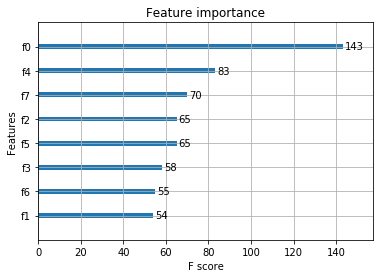

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
The score for XGBoost  0.7083333333333334
Accuracy for x_test: 0.7083333333333334
Accuracy: 70.83%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross Validation Accuracy: 0.69 (+/- 0.31)
[0.416      0.48       0.492      0.788      0.816      0.79116466
 0.81927711 0.75100402 0.76612903 0.80241935]


In [5]:
# XGBoost
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

# plot feature importance
plot_importance(xgb)
pyplot.show()
print(xgb)
print("The score for XGBoost ", xgb.score(x_test, y_test))
y_pred = xgb.predict(x_test)

print("Accuracy for x_test:", metrics.accuracy_score(y_test, y_pred))


predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


scores = cross_val_score(xgb, all_data, labels, cv=10, scoring='accuracy')
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

In [6]:
eval_set = [(x_train, y_train), (x_test, y_test)]
eval_metric = ["auc","error"]

# Model Tuning and feature importance XGBoost

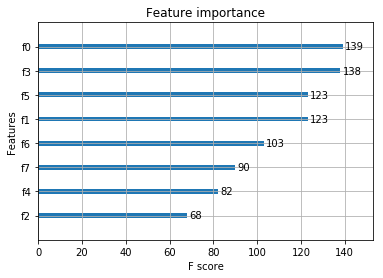

The score for XGBoost  0.7147435897435898
Accuracy for x_test: 0.7147435897435898
Accuracy: 71.47%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross Validation Accuracy: 0.70 (+/- 0.30)
[0.416      0.496      0.516      0.772      0.784      0.81927711
 0.83935743 0.74698795 0.78629032 0.7983871 ]
Thresh=0.079, n=8, Accuracy: 71.47%
Thresh=0.095, n=7, Accuracy: 69.87%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was pass

Thresh=0.104, n=6, Accuracy: 71.31%
Thresh=0.119, n=5, Accuracy: 71.79%
Thresh=0.142, n=4, Accuracy: 70.67%
Thresh=0.142, n=4, Accuracy: 70.67%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was pass

Thresh=0.159, n=2, Accuracy: 69.87%
Thresh=0.161, n=1, Accuracy: 71.47%


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
# XGBoost
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from numpy import sort
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

xgb = XGBClassifier(silent=True, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.3,
                      objective='binary:logistic', 
                      n_estimators=100, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=2)
xgb.fit(x_train, y_train)
# plot feature importance
plot_importance(xgb)
pyplot.show()
# print(xgb)
print("The score for XGBoost ", xgb.score(x_test, y_test))
y_pred = xgb.predict(x_test)

print("Accuracy for x_test:", metrics.accuracy_score(y_test, y_pred))


predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


scores = cross_val_score(xgb, all_data, labels, cv=10, scoring='accuracy')
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

# Fit model using each importance as a threshold
thresholds = sort(xgb.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
	select_X_train = selection.transform(x_train)
	# train model
	selection_model = XGBClassifier(silent=True, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.3,
                      objective='binary:logistic', 
                      n_estimators=100, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=2)
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(x_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 16)                144       
_________________________________________________________________
dense_109 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_110 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_111 (Dense)            (None, 1)                 65        
Total params: 2,865
Trainable params: 2,865
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2245/2245 [==============================] - 4s 2ms/step - loss: 0.6820 - acc: 0.5506
Epoch 2/100
2245/2245 [==============================] - 3s 1ms/step - loss: 0.6744 - acc: 0.5737
Epoch 3/100
2245/2245 [==============================] - 3s 1ms/step - loss:

2245/2245 [==============================] - 3s 1ms/step - loss: 0.5784 - acc: 0.7024
Epoch 76/100
2245/2245 [==============================] - 3s 1ms/step - loss: 0.5772 - acc: 0.6971
Epoch 77/100
2245/2245 [==============================] - 3s 1ms/step - loss: 0.5787 - acc: 0.6940
Epoch 78/100
2245/2245 [==============================] - 3s 1ms/step - loss: 0.5728 - acc: 0.6953
Epoch 79/100
2245/2245 [==============================] - 3s 1ms/step - loss: 0.5798 - acc: 0.6931
Epoch 80/100
2245/2245 [==============================] - 3s 1ms/step - loss: 0.5759 - acc: 0.6944
Epoch 81/100
2245/2245 [==============================] - 3s 1ms/step - loss: 0.5785 - acc: 0.6967
Epoch 82/100
2245/2245 [==============================] - 3s 1ms/step - loss: 0.5782 - acc: 0.6980
Epoch 83/100
2245/2245 [==============================] - 3s 1ms/step - loss: 0.5765 - acc: 0.7024
Epoch 84/100
2245/2245 [==============================] - 3s 1ms/step - loss: 0.5758 - acc: 0.6931
Epoch 85/100
2245/2245 

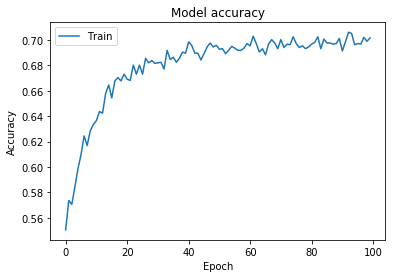

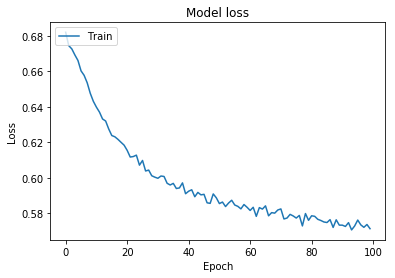

In [20]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

from keras import models
from keras import layers
# from keras import regularizers kernel_regularizer=regularizers.l2(0.01), 
from keras.optimizers import Adam

network = models.Sequential()

network.add(layers.Dense(16, input_shape=(8,)))
network.add(layers.Dense(32, activation="relu"))
network.add(layers.Dense(64, activation="relu"))
# network.add(layers.Dense(64, activation="relu"))
# network.add(layers.Dense(32, activation="relu"))
# network.add(layers.Dense(32, activation="relu"))
# network.add(layers.Dense(16, activation="sigmoid"))
network.add(layers.Dense(1, activation='sigmoid'))

# Adam = Adam(lr=0.05)
network.compile(optimizer=Adam(lr=0.00038),
                loss='binary_crossentropy',
                metrics=['acc'])

network.summary()

history = network.fit(x_train, y_train,
                      epochs=50, verbose=1, batch_size=2)

loss_and_metrics = network.evaluate(x_test, y_test)
print('loss and metrics', loss_and_metrics)

# print('prediction: ', network.predict(test_data))

%matplotlib inline 
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [9]:
all_labels = dataDF.action.values

encoder = LabelBinarizer()
all_labels = encoder.fit_transform(all_labels)
    
# create an array of shape 30706, 9 = number of records by the features
all_data = np.array([[0 for x in range(8)] for y in range(len(dataDF))])
for i in range(len(dataDF)):
    all_data[i] = [dataDF.delta.values[i],
                       dataDF.theta.values[i],
                       dataDF.alphaLow.values[i],
                       dataDF.alphaHigh.values[i],
                       dataDF.betaLow.values[i],
                       dataDF.betaHigh.values[i],
                       dataDF.gammaLow.values[i],
                       dataDF.gammaMid.values[i]]
    
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
stan_scaler = StandardScaler()

all_data = scaler.fit_transform(all_data)




/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [21]:

from sklearn.model_selection import StratifiedKFold

n_splits=5
skf = StratifiedKFold(n_splits, random_state=12)
avg_loss = []
avg_acc = []
# Loop through the indices the split() method returns
for index, (train_index, test_index) in enumerate(skf.split(all_data, labels)):
    print("Training on fold " + str(index + 1) + "/"+n_splits+".............................................")
    # Generate batches from indices
    x_train, x_test = all_data[train_index], all_data[test_index]
    # use one-hot vectors as labels
    y_train, y_test = labels[train_index], labels[test_index]

#     network = models.Sequential()
    

#     network.add(layers.Dense(16, input_shape=(8,)))
#     network.add(layers.Dense(32, activation="relu"))
#     network.add(layers.Dense(64, activation="relu"))
#     network.add(layers.Dense(32, activation="relu"))
#     network.add(layers.Dense(16, activation="sigmoid"))
#     network.add(layers.Dense(1, activation='sigmoid'))

#     # Adam = Adam(lr=0.05)
#     network.compile(optimizer=Adam(lr=0.00038),
#                     loss='binary_crossentropy',
#                     metrics=['acc'])

#     network.summary()

    history = network.fit(x_train, y_train,
                          epochs=50, verbose=1, batch_size=2)

    loss, accuracy = network.evaluate(x_test, y_test)

    # evaluate and store the accuracy
#     loss, accuracy = model.evaluate(xtest_imagelist, ytest, verbose=1)
    avg_loss.append(loss)
    avg_acc.append(accuracy)

    # cross validation score
    print("Average accuracy of model on the dev set = ", np.mean(avg_acc))

Training on fold 1/10.............................................
Epoch 1/50
1994/1994 [==============================] - 2s 806us/step - loss: 0.4980 - acc: 0.7583
Epoch 2/50
1994/1994 [==============================] - 1s 744us/step - loss: 0.4931 - acc: 0.7648
Epoch 3/50
1994/1994 [==============================] - 1s 726us/step - loss: 0.4884 - acc: 0.7703
Epoch 4/50
1994/1994 [==============================] - 1s 727us/step - loss: 0.4908 - acc: 0.7648
Epoch 5/50
1994/1994 [==============================] - 1s 722us/step - loss: 0.4891 - acc: 0.7653
Epoch 6/50
1994/1994 [==============================] - 1s 731us/step - loss: 0.4842 - acc: 0.7713
Epoch 7/50
1994/1994 [==============================] - 1s 719us/step - loss: 0.4861 - acc: 0.7663
Epoch 8/50
1994/1994 [==============================] - 2s 780us/step - loss: 0.4834 - acc: 0.7693
Epoch 9/50
1994/1994 [==============================] - 2s 763us/step - loss: 0.4847 - acc: 0.7653
Epoch 10/50
1994/1994 [===================

1994/1994 [==============================] - 1s 713us/step - loss: 0.5255 - acc: 0.7317
Epoch 31/50
1994/1994 [==============================] - 1s 714us/step - loss: 0.5271 - acc: 0.7332
Epoch 32/50
1994/1994 [==============================] - 1s 738us/step - loss: 0.5267 - acc: 0.7302
Epoch 33/50
1994/1994 [==============================] - 2s 1ms/step - loss: 0.5234 - acc: 0.7267
Epoch 34/50
1994/1994 [==============================] - 2s 831us/step - loss: 0.5267 - acc: 0.7267
Epoch 35/50
1994/1994 [==============================] - 2s 755us/step - loss: 0.5258 - acc: 0.7292
Epoch 36/50
1994/1994 [==============================] - 2s 853us/step - loss: 0.5248 - acc: 0.7257
Epoch 37/50
1994/1994 [==============================] - 2s 932us/step - loss: 0.5250 - acc: 0.7327
Epoch 38/50
1994/1994 [==============================] - 2s 1ms/step - loss: 0.5235 - acc: 0.7292
Epoch 39/50
1994/1994 [==============================] - 2s 995us/step - loss: 0.5241 - acc: 0.7337
Epoch 40/50
1994

1995/1995 [==============================] - 2s 756us/step - loss: 0.5586 - acc: 0.7028
Epoch 9/50
1995/1995 [==============================] - 1s 727us/step - loss: 0.5570 - acc: 0.7013
Epoch 10/50
1995/1995 [==============================] - 2s 828us/step - loss: 0.5554 - acc: 0.6982
Epoch 11/50
1995/1995 [==============================] - 2s 769us/step - loss: 0.5554 - acc: 0.7028
Epoch 12/50
1995/1995 [==============================] - 1s 739us/step - loss: 0.5541 - acc: 0.7038
Epoch 13/50
1995/1995 [==============================] - 2s 752us/step - loss: 0.5560 - acc: 0.6967
Epoch 14/50
1995/1995 [==============================] - 2s 769us/step - loss: 0.5550 - acc: 0.7023
Epoch 15/50
1995/1995 [==============================] - 2s 755us/step - loss: 0.5538 - acc: 0.7063
Epoch 16/50
1995/1995 [==============================] - 2s 762us/step - loss: 0.5493 - acc: 0.7048
Epoch 17/50
1995/1995 [==============================] - 2s 779us/step - loss: 0.5544 - acc: 0.7018
Epoch 18/50
1

1995/1995 [==============================] - 2s 765us/step - loss: 0.5437 - acc: 0.7133
Epoch 39/50
1995/1995 [==============================] - 1s 733us/step - loss: 0.5429 - acc: 0.7083
Epoch 40/50
1995/1995 [==============================] - 1s 731us/step - loss: 0.5466 - acc: 0.7133
Epoch 41/50
1995/1995 [==============================] - 1s 722us/step - loss: 0.5453 - acc: 0.7078
Epoch 42/50
1995/1995 [==============================] - 1s 732us/step - loss: 0.5441 - acc: 0.7143
Epoch 43/50
1995/1995 [==============================] - 1s 728us/step - loss: 0.5445 - acc: 0.7123
Epoch 44/50
1995/1995 [==============================] - 2s 760us/step - loss: 0.5441 - acc: 0.7123
Epoch 45/50
1995/1995 [==============================] - 2s 832us/step - loss: 0.5456 - acc: 0.7183
Epoch 46/50
1995/1995 [==============================] - 2s 769us/step - loss: 0.5449 - acc: 0.7098
Epoch 47/50
1995/1995 [==============================] - 2s 776us/step - loss: 0.5433 - acc: 0.7143
Epoch 48/50
